# Notebook setup

1. Install the environment using the file `environment.yml`
2. Create the environment
>mamba env create -f environment.yml 
3. Activate it 
>mamba activate AC2025_tutorial_RMT

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Spike in GOE

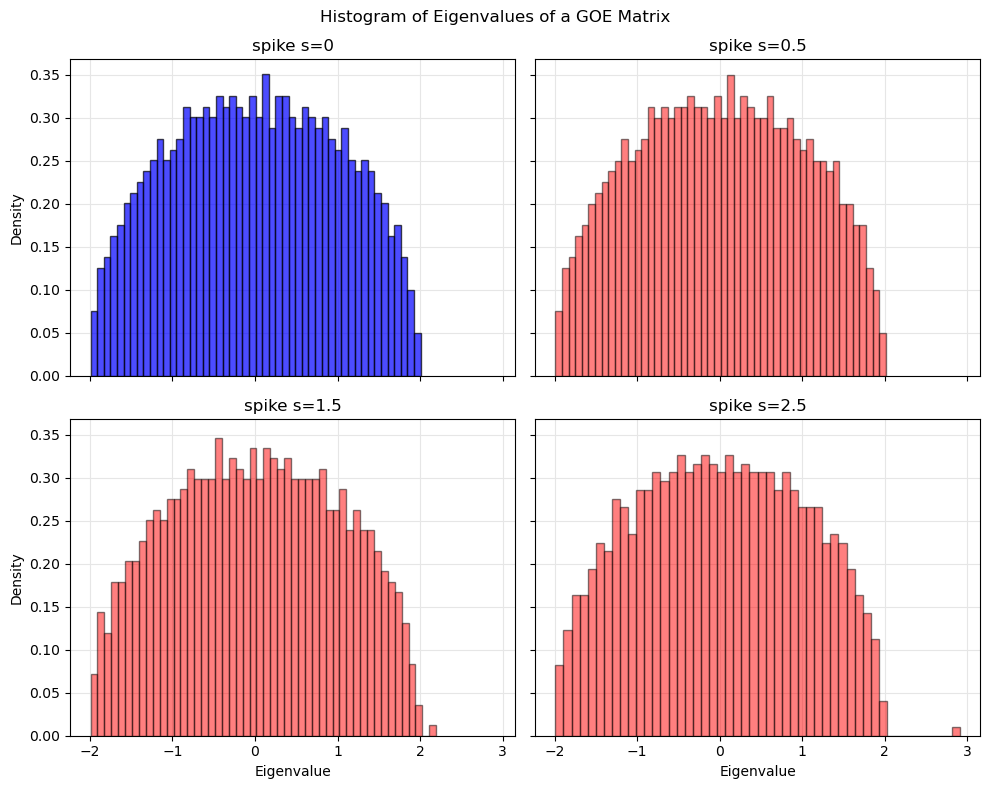

In [2]:
N = 1000
GOE = np.random.randn(N, N)/np.sqrt(N)  
GOE = (GOE + GOE.T) / np.sqrt(2)
np.fill_diagonal(GOE, 0)


fig, ax = plt.subplots(2,2, figsize=(10, 8), sharex=True, sharey=True)
eigenvalues, eigenvectors = np.linalg.eigh(GOE)
ax[0,0].hist(eigenvalues, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black',zorder=10)
ax[0,0].grid(color=[.9, .9, .9],zorder=0)
ax[0,0].set_title('spike s=0')

idx = 1
for s in [0.5,1.5,2.5]:
    GOE_spiked = GOE.copy()
    GOE_spiked[0, 0] += s  # Add a spike to
    eigenvalues_spiked, eigenvectors_spiked = np.linalg.eigh(GOE_spiked)
    ax[idx//2, idx%2].hist(eigenvalues_spiked, bins=50, density=True, alpha=0.5, color='red', edgecolor='black', zorder=5, label=f'spike={s}')
    ax[idx//2, idx%2].grid(color=[.9, .9, .9],zorder=0)
    ax[idx//2, idx%2].set_title(f'spike s={s}')
    # if s >= np.sqrt(2):
    #     ax[idx//2, idx%2].axvline(s+1/s, color='black', linestyle='--', linewidth=1, zorder=15)
    idx += 1

plt.suptitle('Histogram of Eigenvalues of a GOE Matrix')

ax[0,0].set_ylabel('Density')
ax[1,0].set_ylabel('Density')
ax[1,0].set_xlabel('Eigenvalue')
ax[1,1].set_xlabel('Eigenvalue')

plt.tight_layout()

plt.show()


In [3]:
# semicircle law
def semicircle_density(lam):
    if np.abs(lam) <= 2:
        return 1/(2*np.pi) * np.sqrt(4 - lam**2)
    else:
        return 0


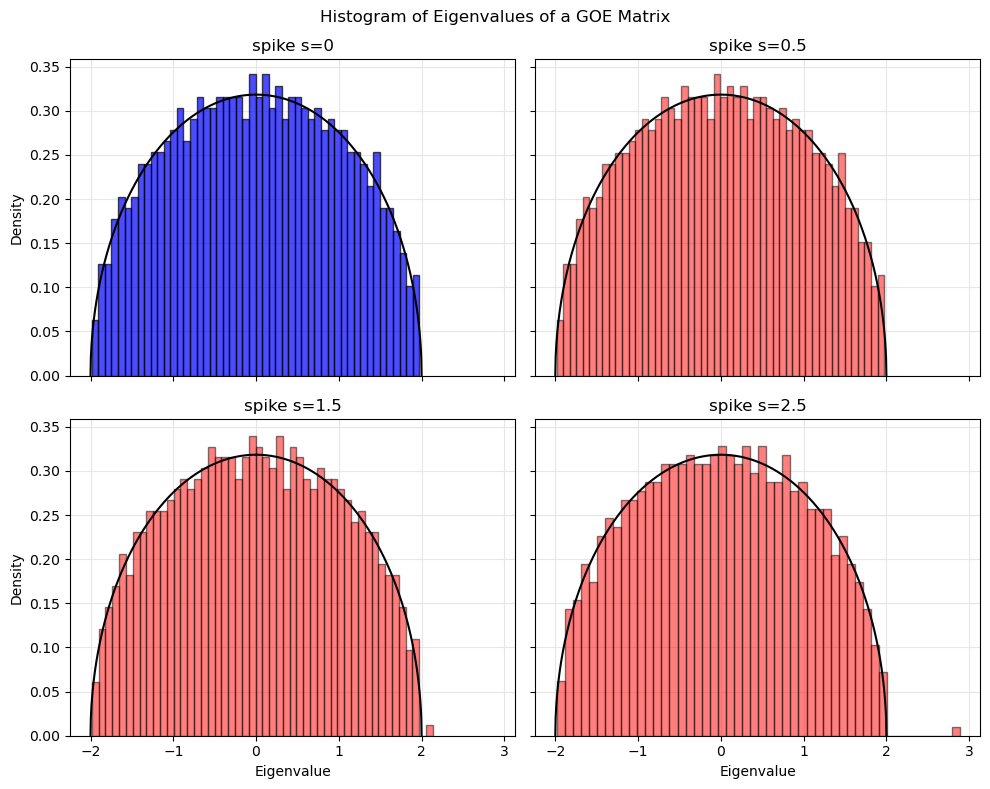

In [4]:
N = 1000
GOE = np.random.randn(N, N)/np.sqrt(N)  
GOE = (GOE + GOE.T) / np.sqrt(2)
np.fill_diagonal(GOE, 0)

lambda_values = np.linspace(-2, 2, 1000)
semicircle_values = [semicircle_density(lam) for lam in lambda_values]

fig, ax = plt.subplots(2,2, figsize=(10, 8), sharex=True, sharey=True)
eigenvalues, eigenvectors = np.linalg.eigh(GOE)
ax[0,0].hist(eigenvalues, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black',zorder=10)
ax[0,0].plot(lambda_values, semicircle_values, color='k', label='Semicircle Law', zorder=20)
ax[0,0].grid(color=[.9, .9, .9],zorder=0)
ax[0,0].set_title('spike s=0')

idx = 1
for s in [0.5,1.5,2.5]:
    GOE_spiked = GOE.copy()
    GOE_spiked[0, 0] += s  # Add a spike to
    eigenvalues_spiked, eigenvectors_spiked = np.linalg.eigh(GOE_spiked)
    ax[idx//2, idx%2].hist(eigenvalues_spiked, bins=50, density=True, alpha=0.5, color='red', edgecolor='black', zorder=5, label=f'spike={s}')
    ax[idx//2, idx%2].plot(lambda_values, semicircle_values, color='k', label='Semicircle Law', zorder=20)
    ax[idx//2, idx%2].grid(color=[.9, .9, .9],zorder=0)
    ax[idx//2, idx%2].set_title(f'spike s={s}')
    # if s >= np.sqrt(2):
    #     ax[idx//2, idx%2].axvline(s+1/s, color='black', linestyle='--', linewidth=1, zorder=15)
    idx += 1

plt.suptitle('Histogram of Eigenvalues of a GOE Matrix')

ax[0,0].set_ylabel('Density')
ax[1,0].set_ylabel('Density')
ax[1,0].set_xlabel('Eigenvalue')
ax[1,1].set_xlabel('Eigenvalue')

plt.tight_layout()

plt.show()


In [5]:
# spike location
def spike_location(s):
    if s < 2:
        return s + 1/s
    else:
        return None

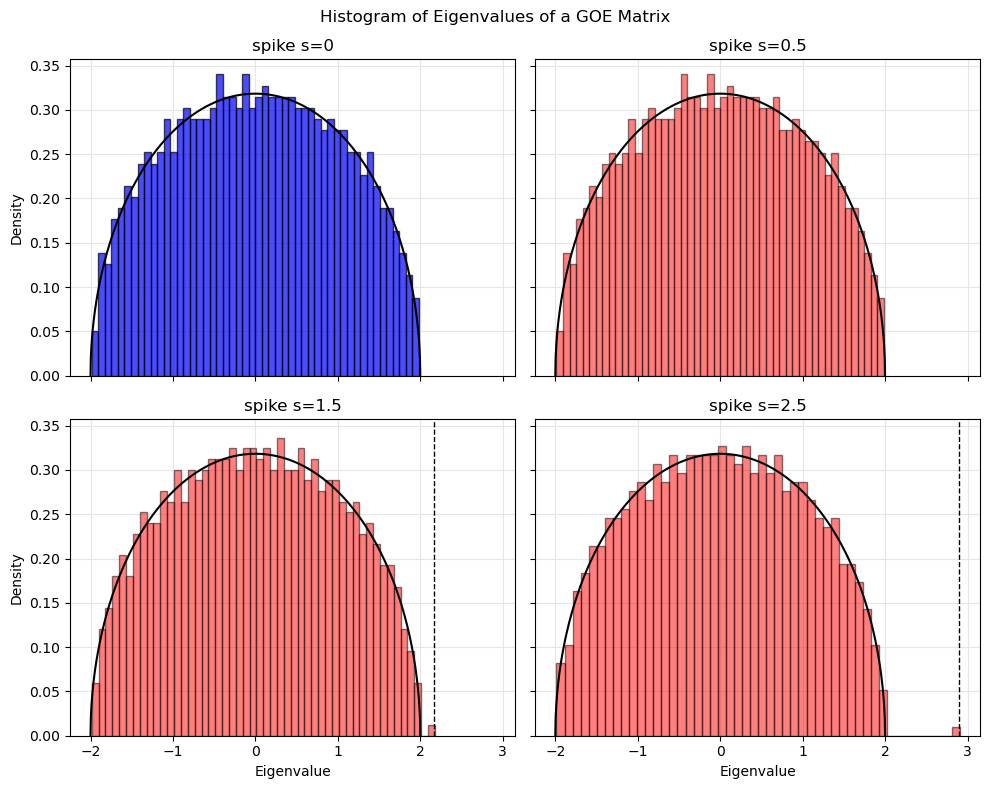

In [6]:
N = 1000
GOE = np.random.randn(N, N)/np.sqrt(N)  
GOE = (GOE + GOE.T) / np.sqrt(2)
np.fill_diagonal(GOE, 0)

lambda_values = np.linspace(-2, 2, 1000)
semicircle_values = [semicircle_density(lam) for lam in lambda_values]

fig, ax = plt.subplots(2,2, figsize=(10, 8), sharex=True, sharey=True)

eigenvalues, eigenvectors = np.linalg.eigh(GOE)
ax[0,0].hist(eigenvalues, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black',zorder=10)
ax[0,0].plot(lambda_values, semicircle_values, color='k', label='Semicircle Law', zorder=20)
ax[0,0].grid(color=[.9, .9, .9],zorder=0)
ax[0,0].set_title('spike s=0')

idx = 1
for s in [0.5,1.5,2.5]:
    GOE_spiked = GOE.copy()
    GOE_spiked[0, 0] += s  # Add a spike to
    eigenvalues_spiked, eigenvectors_spiked = np.linalg.eigh(GOE_spiked)
    ax[idx//2, idx%2].hist(eigenvalues_spiked, bins=50, density=True, alpha=0.5, color='red', edgecolor='black', zorder=5, label=f'spike={s}')
    ax[idx//2, idx%2].plot(lambda_values, semicircle_values, color='k', label='Semicircle Law', zorder=20)
    ax[idx//2, idx%2].grid(color=[.9, .9, .9],zorder=0)
    ax[idx//2, idx%2].set_title(f'spike s={s}')
    if s >= np.sqrt(2):
        ax[idx//2, idx%2].axvline(s+1/s, color='black', linestyle='--', linewidth=1, zorder=15)
    idx += 1

plt.suptitle('Histogram of Eigenvalues of a GOE Matrix')

ax[0,0].set_ylabel('Density')
ax[1,0].set_ylabel('Density')
ax[1,0].set_xlabel('Eigenvalue')
ax[1,1].set_xlabel('Eigenvalue')

plt.tight_layout()

plt.show()
